# SST-2

In [1]:
import json
import pandas as pd

data = []

with open('data/sst2/train_diff_sst2.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df 

,0,1,text,label,label_text
0,0.486339,0.513661,"a stirring , funny and finally transporting re...",1,positive
1,0.516552,0.483448,apparently reassembled from the cutting-room f...,0,negative
2,0.504313,0.495687,they presume their audience wo n't sit still f...,0,negative
3,0.491919,0.508081,this is a visually stunning rumination on love...,1,positive
4,0.492822,0.507178,jonathan parker 's bartleby should have been t...,1,positive
...,...,...,...,...,...
6915,0.483726,0.516274,"painful , horrifying and oppressively tragic ,...",1,positive
6916,0.506809,0.493191,take care is nicely performed by a quintet of ...,0,negative
6917,0.506408,0.493592,"the script covers huge , heavy topics in a bla...",0,negative
6918,0.512368,0.487632,a seriously bad film with seriously warped log...,0,negative


In [2]:
def find_largest_column(row):
    # Get the column names of the largest values
    largest_column = row.idxmax()
    return largest_column

def find_lowest_column(row):
    # Get the column names of the largest values
    largest_column = row.idxmin()
    return largest_column 

df['pseudo_gt'] = df[["0", "1"]].apply(find_largest_column, axis=1)
df['pseudo_gt'] = df['pseudo_gt'].apply(int)

df.to_json('data/sst2/train_diff_sst2.jsonl', orient='records', lines=True)
df

,0,1,text,label,label_text,pseudo_gt
0,0.486339,0.513661,"a stirring , funny and finally transporting re...",1,positive,1
1,0.516552,0.483448,apparently reassembled from the cutting-room f...,0,negative,0
2,0.504313,0.495687,they presume their audience wo n't sit still f...,0,negative,0
3,0.491919,0.508081,this is a visually stunning rumination on love...,1,positive,1
4,0.492822,0.507178,jonathan parker 's bartleby should have been t...,1,positive,1
...,...,...,...,...,...,...
6915,0.483726,0.516274,"painful , horrifying and oppressively tragic ,...",1,positive,1
6916,0.506809,0.493191,take care is nicely performed by a quintet of ...,0,negative,0
6917,0.506408,0.493592,"the script covers huge , heavy topics in a bla...",0,negative,0
6918,0.512368,0.487632,a seriously bad film with seriously warped log...,0,negative,0


In [3]:
l = len(df)
#right = len(df.loc[df['label'] == df['teacher_label']])
right = len(df.loc[df['pseudo_gt'] == df['label']])

print(right/l)

1.0


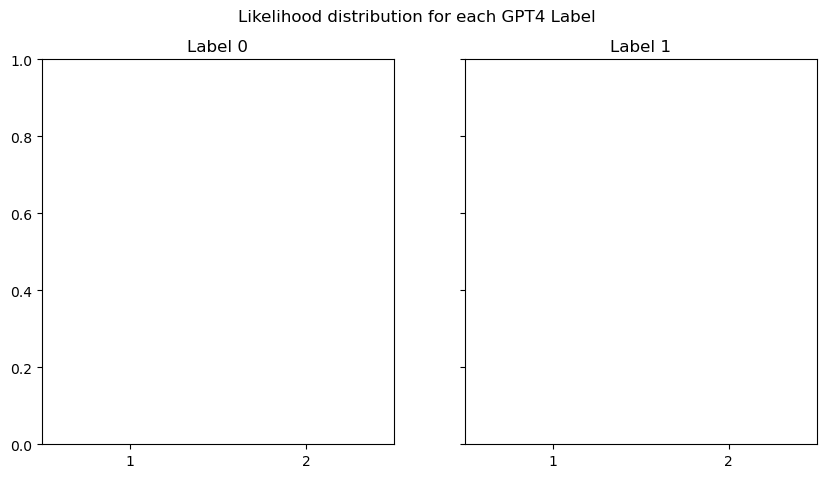

In [5]:
import matplotlib.pyplot as plt 
labels = ["0", "1"]

# Dict for rows corresponding to certain teacher_label 
classes = {}

for l in labels:
    classes[l] = df.loc[df['pseudo_gt'] == l]

fig, axs = plt.subplots(1, 2, sharey = True, figsize = (10, 5))

fig.suptitle('Likelihood distribution for each GPT4 Label')

for i in range (0, 2):
    l = labels[i]
    axs[i].boxplot([classes[l]["0"], classes[l]["1"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.0, 1.0)
    num += 1

plt.show()
